<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item">
    <li><span><a href="#Load-Data" data-toc-modified-id="Load Data">Load Data</a></span></li>
    <li><span><a href="#Check-for-Nan" data-toc-modified-id="Check for Nan">Check for Nan</a></span></li>
    <li><span><a href="#Check-for-distribution" data-toc-modified-id="Check for distribution">Check for distribution</a></span></li>
    <li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split">Train-Test-Split</a></span></li>
    <li><span><a href="#SARIMA" data-toc-modified-id="SARIMA">SARIMA</a></span></li>
    <li><span><a href="#TES" data-toc-modified-id="TES">TES</a></span></li>
    <li><span><a href="#SARIMAX" data-toc-modified-id="SARIMAX">SARIMAX</a></span></li>
    <li><span><a href="#Impute-with-median" data-toc-modified-id="Impute with median">Impute with median</a></span></li>
    <li><span><a href="#ARIMA-Impute-and-VAR" data-toc-modified-id="ARIMA Impute and VAR">ARIMA Impute and VAR</a></span></li>
    

    
</ul></div>

Load Data
-----

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
zillow = pd.read_csv("zillow-carlifornia .csv")

In [3]:
zillow = zillow.drop(['Date'], axis=1)
zillow.head()

,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate,MedianRentalPrice_AllHomes.California
0,326752.55,5.02,7.9,NaN
1,329501.50,4.94,7.8,NaN
2,340125.45,4.74,7.8,NaN
3,355329.50,5.16,7.5,NaN
4,367818.15,5.64,7.3,NaN


Train-Test Split
-----

In [4]:
tmp = zillow.loc[~zillow['MedianSoldPrice_AllHomes.California'].isna()]
train = tmp[:int(0.85*(len(tmp)))]
test = tmp[int(0.85*(len(tmp))):]
train.head()

,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate,MedianRentalPrice_AllHomes.California
0,326752.55,5.02,7.9,NaN
1,329501.50,4.94,7.8,NaN
2,340125.45,4.74,7.8,NaN
3,355329.50,5.16,7.5,NaN
4,367818.15,5.64,7.3,NaN


Check for Nan
-----

In [5]:
zillow.isna().sum()

MedianSoldPrice_AllHomes.California      20
MedianMortageRate                         0
UnemploymentRate                          0
MedianRentalPrice_AllHomes.California    72
dtype: int64

In [6]:
# There's empty value for Median sold price and median rental price

Check for distribution
-----

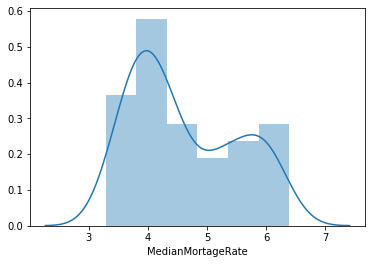

In [7]:
sns.distplot(zillow["MedianMortageRate"])

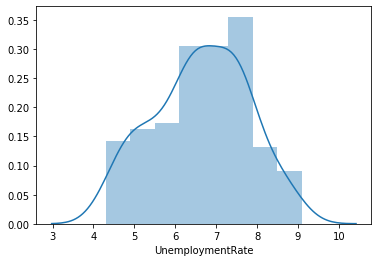

In [8]:
sns.distplot(zillow["UnemploymentRate"])

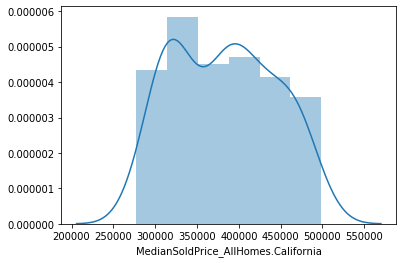

In [9]:
sns.distplot(zillow.dropna(subset=['MedianSoldPrice_AllHomes.California'])["MedianSoldPrice_AllHomes.California"])

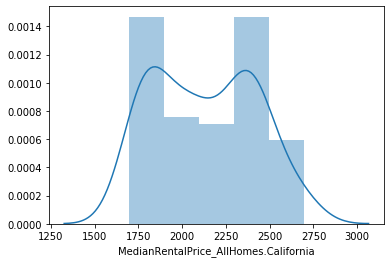

In [10]:
sns.distplot(zillow.dropna(subset=['MedianRentalPrice_AllHomes.California'])["MedianRentalPrice_AllHomes.California"])

SARIMA
------

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [12]:
y_train = train['MedianSoldPrice_AllHomes.California']
y_test = test['MedianSoldPrice_AllHomes.California']

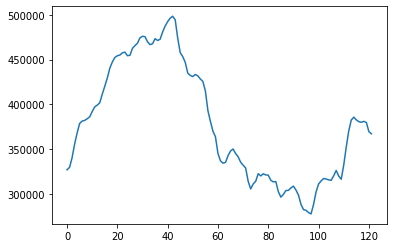

In [13]:
pyplot.plot(y_train)
pyplot.show()

In [14]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

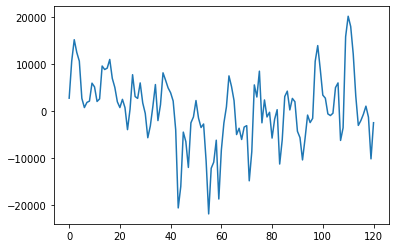

Results of Dickey-Fuller Test:
Test Statistic                  -1.483526
p-value                          0.541645
#Lags Used                      12.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64


In [15]:
d1 = list()
for i in range(1, len(y_train)):
    value = y_train[i] - y_train[i - 1]
    d1.append(value)

plt.plot(d1) 
pyplot.show()
adf_test(d1)

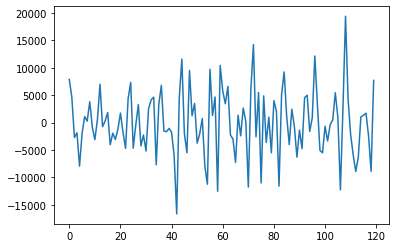

Results of Dickey-Fuller Test:
Test Statistic                  -4.430970
p-value                          0.000262
#Lags Used                      11.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64


In [16]:
d2 = list()
for i in range(1, len(d1)):
    value = d1[i] - d1[i - 1]
    d2.append(value)

plt.plot(d2) 
plt.show()

adf_test(d2)

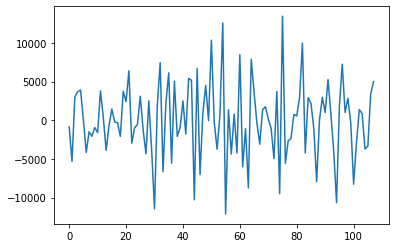

Results of Dickey-Fuller Test:
Test Statistic                 -4.447752
p-value                         0.000244
#Lags Used                     13.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


In [17]:
d3 = list()
for i in range(12, len(d2)):
    value = d2[i] - d2[i - 12]
    d3.append(value)


plt.plot(d3) 
plt.show()

adf_test(d3)

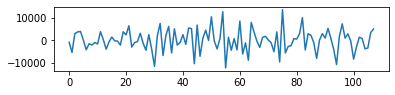

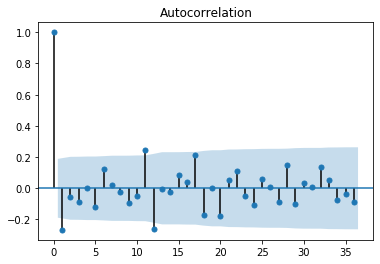

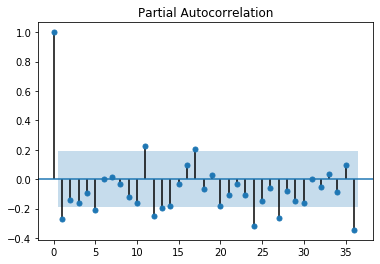

In [18]:
plt.subplot(3,1,1)
plt.plot(d3) 
plt.show()
plot_acf(d3,lags=36) 
plt.show()
plot_pacf(d3,lags=36) 
plt.show()

In [19]:
import pmdarima as pm
model_SARIMA = pm.auto_arima(y_train, start_p=1, start_q=1,
                           max_p=3, max_q=3, 
                           start_P=0, seasonal=True,
                           d=2, D=1, m=12, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model_SARIMA.summary())

Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 1, 1, 12); AIC=2133.084, BIC=2146.495, Fit time=0.514 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 1, 0, 12); AIC=2144.236, BIC=2149.600, Fit time=0.011 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 1, 0, 12); AIC=2147.821, BIC=2158.550, Fit time=0.084 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 1, 1, 12); AIC=2147.965, BIC=2158.694, Fit time=0.133 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(1, 1, 1, 12); AIC=2135.061, BIC=2151.153, Fit time=0.738 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 1, 0, 12); AIC=2131.146, BIC=2141.874, Fit time=0.127 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 1, 0, 12); AIC=2146.134, BIC=2154.181, Fit time=0.054 seconds
Fit ARIMA: order=(2, 2, 1) seasonal_order=(0, 1, 0, 12); AIC=2133.132, BIC=2146.542, Fit time=0.241 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 1, 0, 12); AIC=2145.986, BIC=2154.033, Fit time=0.032 seconds
Fit ARIMA: order=(1, 2, 2) s

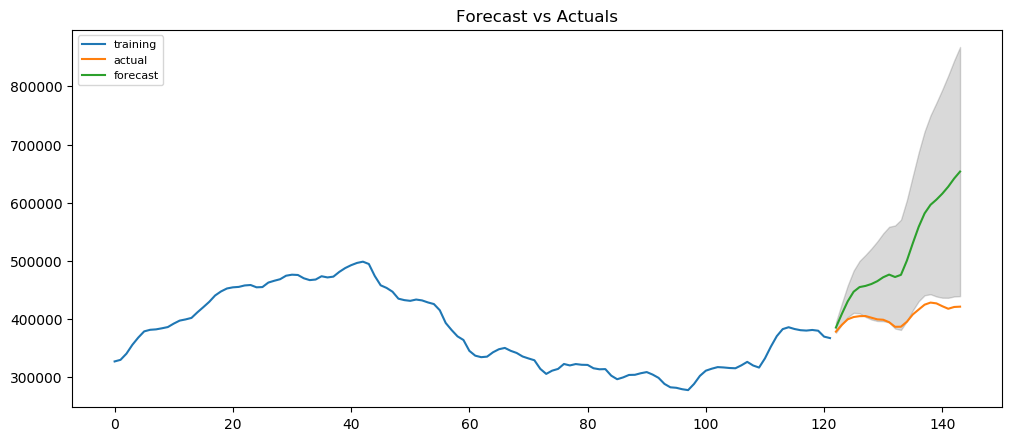

In [20]:
fitted = model_SARIMA.fit(y_train)
fc, conf = fitted.predict(len(y_test),return_conf_int=True,alpha=0.05)
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(y_train, label='training')
plt.plot(y_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [21]:
mse = ((fc_series - y_test) ** 2).mean()
rmse_SARIMA=round(np.sqrt(mse), 2)
print("RMSE for SARIMA: {:,.2f}".format(rmse_SARIMA))

RMSE for SARIMA: 127,775.87


TES
------

### Non-damped

In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [23]:
model = ExponentialSmoothing(y_train, trend="add", seasonal="add", seasonal_periods=12,damped=True)
model2 = ExponentialSmoothing(y_train, trend="add", seasonal="mul", seasonal_periods=12, damped=True)
model3 = ExponentialSmoothing(y_train, trend="mul", seasonal="add", seasonal_periods=12, damped=True)
model4 = ExponentialSmoothing(y_train, trend="mul", seasonal="mul", seasonal_periods=12, damped=True)
fit = model.fit()
pred = fit.forecast(len(y_test))
fit2 = model2.fit()
pred2 = fit2.forecast(len(y_test))
fit3 = model3.fit()
pred3 = fit3.forecast(len(y_test))
fit4 = model4.fit()
pred4 = fit4.forecast(len(y_test))

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


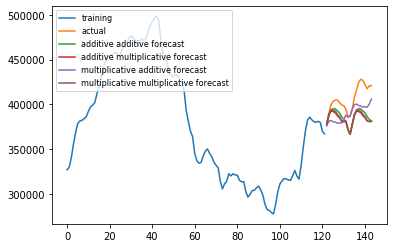

In [24]:
plt.plot(y_train, label='training')
plt.plot(y_test, label='actual')
plt.plot(pred, label='additive additive forecast')
plt.plot(pred2, label='additive multiplicative forecast')
plt.plot(pred3, label='multiplicative additive forecast')
plt.plot(pred4, label='multiplicative multiplicative forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [25]:
rmse1 = np.sqrt(np.mean(np.square(y_test.values - pred.values)))
rmse2 = np.sqrt(np.mean(np.square(y_test.values - pred2.values)))
rmse3 = np.sqrt(np.mean(np.square(y_test.values - pred3.values)))
rmse4 = np.sqrt(np.mean(np.square(y_test.values - pred4.values)))
print("RMSE for additive forecast: {:,.2f}".format(rmse1))
print("RMSE for additive forecast: {:,.2f}".format(rmse2))
print("RMSE for additive forecast: {:,.2f}".format(rmse3))
print("RMSE for additive forecast: {:,.2f}".format(rmse4))

RMSE for additive forecast: 22,393.17
RMSE for additive forecast: 24,786.80
RMSE for additive forecast: 18,898.16
RMSE for additive forecast: 24,116.02


### damped

In [26]:
model = ExponentialSmoothing(y_train, trend="add", seasonal="add", seasonal_periods=12,damped=False)
model2 = ExponentialSmoothing(y_train, trend="add", seasonal="mul", seasonal_periods=12, damped=False)
model3 = ExponentialSmoothing(y_train, trend="mul", seasonal="add", seasonal_periods=12, damped=False)
model4 = ExponentialSmoothing(y_train, trend="mul", seasonal="mul", seasonal_periods=12, damped=False)
fit = model.fit()
pred = fit.forecast(len(y_test))
fit2 = model2.fit()
pred2 = fit2.forecast(len(y_test))
fit3 = model3.fit()
pred3 = fit3.forecast(len(y_test))
fit4 = model4.fit()
pred4 = fit4.forecast(len(y_test))

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:880: RuntimeWarning: overflow encountered in multiply
  (alphac * trended(lvls[i - 1], dampen(b[i - 1], phi)))
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:885: RuntimeWarning: overflow encountered in multiply
  (gamma * trended(lvls[i - 1], dampen(b[i - 1], phi))) + \
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:882: RuntimeWarning: invalid value encountered in true_divide
  b[i] = (beta * detrend(lvls[i], lvls[i - 1])) + \
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/ts

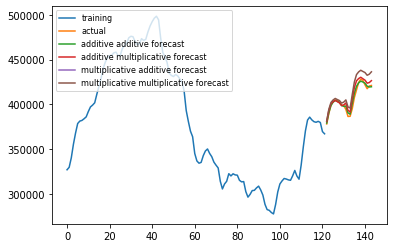

In [27]:
plt.plot(y_train, label='training')
plt.plot(y_test, label='actual')
plt.plot(pred, label='additive additive forecast')
plt.plot(pred2, label='additive multiplicative forecast')
plt.plot(pred3, label='multiplicative additive forecast')
plt.plot(pred4, label='multiplicative multiplicative forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [28]:
rmse1 = np.sqrt(np.mean(np.square(y_test.values - pred.values)))
rmse2 = np.sqrt(np.mean(np.square(y_test.values - pred2.values)))
rmse3 = np.sqrt(np.mean(np.square(y_test.values - pred3.values)))
rmse4 = np.sqrt(np.mean(np.square(y_test.values - pred4.values)))
print("RMSE for additive forecast: {:,.2f}".format(rmse1))
print("RMSE for additive forecast: {:,.2f}".format(rmse2))
print("RMSE for additive forecast: {:,.2f}".format(rmse3))
print("RMSE for additive forecast: {:,.2f}".format(rmse4))

RMSE for additive forecast: 2,479.56
RMSE for additive forecast: 5,313.00
RMSE for additive forecast: nan
RMSE for additive forecast: 10,429.55


SARIMAX
-----

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [30]:
Unemployment_Rate=tmp['UnemploymentRate']
train_size = len(y_train)
exog_train=Unemployment_Rate[:train_size, None]
exog_test=Unemployment_Rate[train_size:,None]

In [31]:
modelx = SARIMAX(y_train, order=(1,2,1), seasonal_order=(0, 1, 0, 12), exog=exog_train)
fitx=modelx.fit()
print(fitx.summary())

                                    Statespace Model Results                                   
Dep. Variable:     MedianSoldPrice_AllHomes.California   No. Observations:                  122
Model:                  SARIMAX(1, 2, 1)x(0, 1, 0, 12)   Log Likelihood               -1063.878
Date:                                 Tue, 10 Dec 2019   AIC                           2135.756
Time:                                         16:45:45   BIC                           2146.485
Sample:                                              0   HQIC                          2140.106
                                                 - 122                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           377.0137   1068.233      0.353      0.724   -1716.685    2470

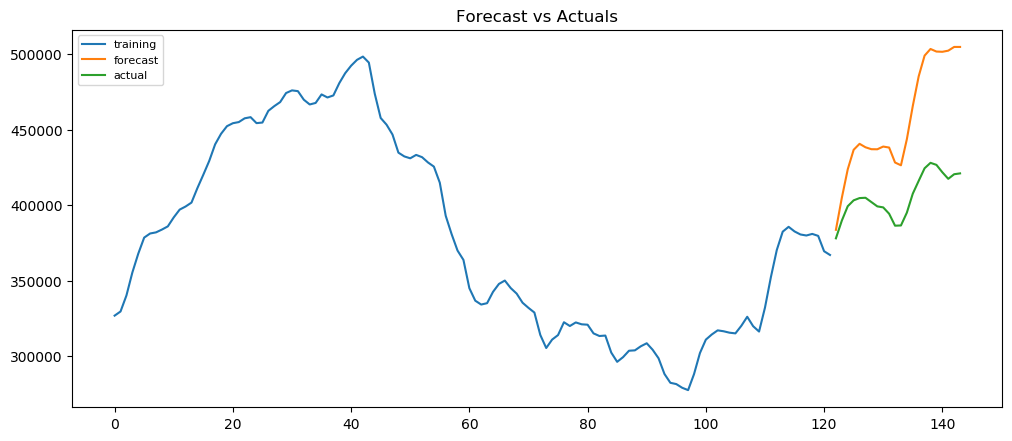

In [32]:
fc = fitx.predict(start=122, end=143, exog=exog_test)

fc_series = pd.Series(fc)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(y_train, label='training')
plt.plot(fc_series, label='forecast')

plt.plot(y_test, label='actual')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()



In [33]:
mse = ((fc_series - y_test) ** 2).mean()
rmse=round(np.sqrt(mse), 2)
print("RMSE for SARIMA: {:,.2f}".format(rmse))

RMSE for SARIMA: 56,044.06


In [34]:
Unemployment_Rate=tmp[['MedianMortageRate','UnemploymentRate']]
train_size = len(y_train)
exog_train=Unemployment_Rate[:train_size].to_numpy()
exog_test=Unemployment_Rate[train_size:].to_numpy()

In [35]:
modelx = SARIMAX(y_train, order=(1,2,1), seasonal_order=(0, 1, 0, 12), exog=exog_train)
fitx=modelx.fit()
print(fitx.summary())

                                    Statespace Model Results                                   
Dep. Variable:     MedianSoldPrice_AllHomes.California   No. Observations:                  122
Model:                  SARIMAX(1, 2, 1)x(0, 1, 0, 12)   Log Likelihood               -1061.975
Date:                                 Tue, 10 Dec 2019   AIC                           2133.951
Time:                                         16:45:45   BIC                           2147.361
Sample:                                              0   HQIC                          2139.388
                                                 - 122                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2745.8379   1448.840      1.895      0.058     -93.835    5585

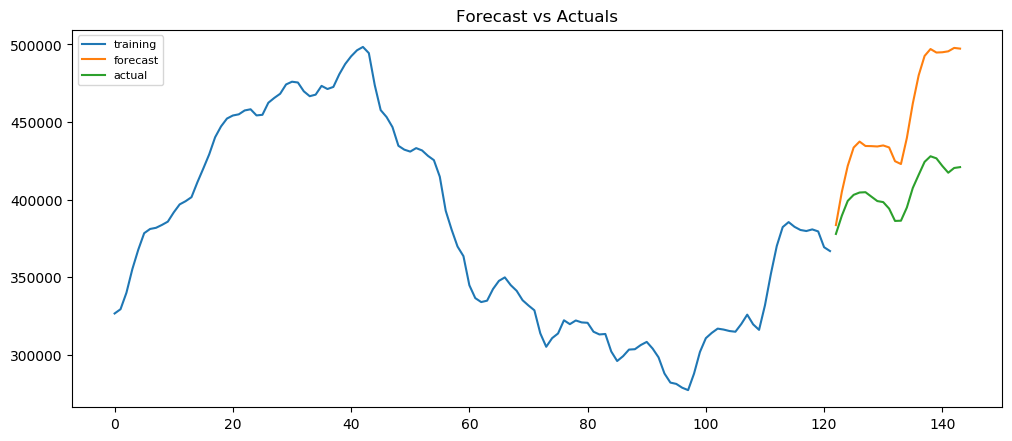

In [36]:
fc = fitx.predict(start=122, end=143, exog=exog_test)

fc_series = pd.Series(fc)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(y_train, label='training')
plt.plot(fc_series, label='forecast')

plt.plot(y_test, label='actual')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [37]:
mse = ((fc_series - y_test) ** 2).mean()
rmse=round(np.sqrt(mse), 2)
print("RMSE for SARIMA: {:,.2f}".format(rmse))

RMSE for SARIMA: 51,375.15


Impute with median and VAR
-----

### Imputation

In [38]:
med = np.median(zillow['MedianRentalPrice_AllHomes.California'].dropna())

In [39]:
zillow['MedianRentalPrice_AllHomes.California'] = zillow['MedianRentalPrice_AllHomes.California'].fillna(med)

In [40]:
series = zillow.loc[~zillow['MedianSoldPrice_AllHomes.California'].isna()]

In [41]:
train = series[:int(0.85*(len(series)))]
test = series[int(0.85*(len(series))):]
train.head()

,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate,MedianRentalPrice_AllHomes.California
0,326752.55,5.02,7.9,2100.0
1,329501.50,4.94,7.8,2100.0
2,340125.45,4.74,7.8,2100.0
3,355329.50,5.16,7.5,2100.0
4,367818.15,5.64,7.3,2100.0


### VAR

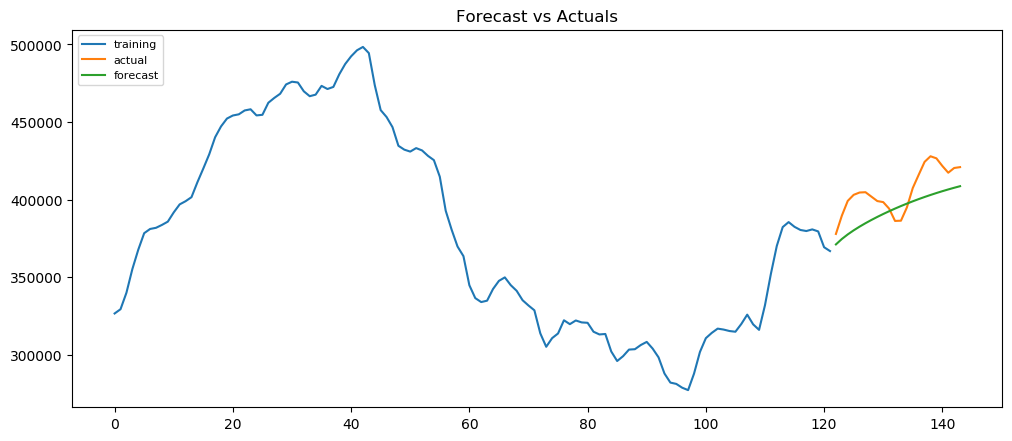

In [42]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit(1, ic='bic')
# print(model_fit.summary())

fc = model_fit.forecast(model_fit.y, steps=len(test))
cols = series.columns
pred = pd.DataFrame(index=test.index,columns=[cols])
for j in range(0,2):
    for i in range(0, len(fc)):
        pred.iloc[i][j] = fc[i][j]
    
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train["MedianSoldPrice_AllHomes.California"], label='training')
plt.plot(test["MedianSoldPrice_AllHomes.California"], label='actual')
plt.plot(pred[["MedianSoldPrice_AllHomes.California"]], label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [43]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test["MedianSoldPrice_AllHomes.California"].values.flatten(), pred["MedianSoldPrice_AllHomes.California"].values.flatten())

242463105.32980508

In [44]:
mse = ((pred["MedianSoldPrice_AllHomes.California"].values.flatten() - test["MedianSoldPrice_AllHomes.California"].values.flatten()) ** 2).mean()
rmse=round(np.sqrt(mse), 2)
print("RMSE for SARIMA: {:,.2f}".format(rmse))

RMSE for SARIMA: 15,571.23


ARIMA Impute and VAR
-----

### Imputation

In [45]:
zillow = pd.read_csv("zillow-carlifornia .csv")
zillow = zillow.drop(['Date'], axis=1)

In [46]:
inversed_rental = zillow['MedianRentalPrice_AllHomes.California'].sort_index(ascending=False).reset_index().drop(columns='index')
train_rental = inversed_rental[~inversed_rental['MedianRentalPrice_AllHomes.California'].isna()]['MedianRentalPrice_AllHomes.California']

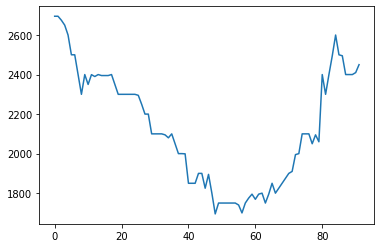

In [47]:
plt.plot(train_rental)

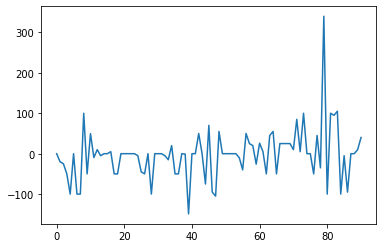

In [48]:
d1 = list()
for i in range(1, len(train_rental)):
    value = train_rental[i] - train_rental[i - 1]
    d1.append(value)

plt.plot(d1) 
pyplot.show()

In [49]:
adf_test(d1)

Results of Dickey-Fuller Test:
Test Statistic                -5.850270e+00
p-value                        3.603010e-07
#Lags Used                     1.000000e+00
Number of Observations Used    8.900000e+01
Critical Value (1%)           -3.506057e+00
Critical Value (5%)           -2.894607e+00
Critical Value (10%)          -2.584410e+00
dtype: float64


In [50]:
import pmdarima as pm
model_rental = pm.auto_arima(train_rental, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_rental.summary())

Fit ARIMA: order=(1, 1, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0); AIC=1013.491, BIC=1018.513, Fit time=0.003 seconds
Fit ARIMA: order=(1, 1, 0); AIC=1013.307, BIC=1020.839, Fit time=0.035 seconds
Fit ARIMA: order=(0, 1, 1); AIC=1013.925, BIC=1021.458, Fit time=0.015 seconds
Fit ARIMA: order=(2, 1, 0); AIC=1012.382, BIC=1022.425, Fit time=0.045 seconds
Fit ARIMA: order=(2, 1, 1); AIC=1101.090, BIC=1113.645, Fit time=0.232 seconds
Fit ARIMA: order=(3, 1, 1); AIC=1035.781, BIC=1050.846, Fit time=0.299 seconds
Fit ARIMA: order=(3, 1, 0); AIC=1013.460, BIC=1026.015, Fit time=0.050 seconds
Total fit time: 0.702 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   91
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -502.191
Method:                       css-mle   S.D. of innovations             60.290
Date:                Tue, 10 Dec 2

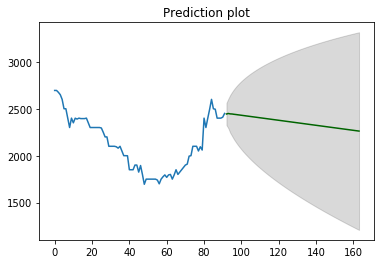

In [51]:
# Forecast
n_periods = 72
fc, confint = model_rental.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(train_rental), len(train_rental)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train_rental)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Prediction plot")
plt.show()

In [52]:
zillow['MedianRentalPrice_AllHomes.California'] = pd.concat([train_rental,fc_series]).sort_index(ascending=False).reset_index().drop(columns='index')[0]

In [53]:
series = zillow.loc[~zillow['MedianSoldPrice_AllHomes.California'].isna()]

In [54]:
train = series[:int(0.85*(len(series)))]
test = series[int(0.85*(len(series))):]
train.head()

,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate,MedianRentalPrice_AllHomes.California
0,326752.55,5.02,7.9,2262.043141
1,329501.50,4.94,7.8,2264.718204
2,340125.45,4.74,7.8,2267.393266
3,355329.50,5.16,7.5,2270.068329
4,367818.15,5.64,7.3,2272.743392


In [55]:
train.describe()

,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate,MedianRentalPrice_AllHomes.California
count,122.000000,122.000000,122.000000,122.000000
mean,378173.910246,4.869262,7.054098,2208.930447
std,64866.035432,0.890577,0.875389,253.335030
min,277400.000000,3.290000,5.300000,1695.000000
25%,319781.737500,4.150000,6.400000,1996.250000
50%,370062.725000,4.755000,7.000000,2319.556987
75%,438875.450000,5.697500,7.600000,2399.617833
max,498400.000000,6.390000,9.100000,2600.000000


### VAR

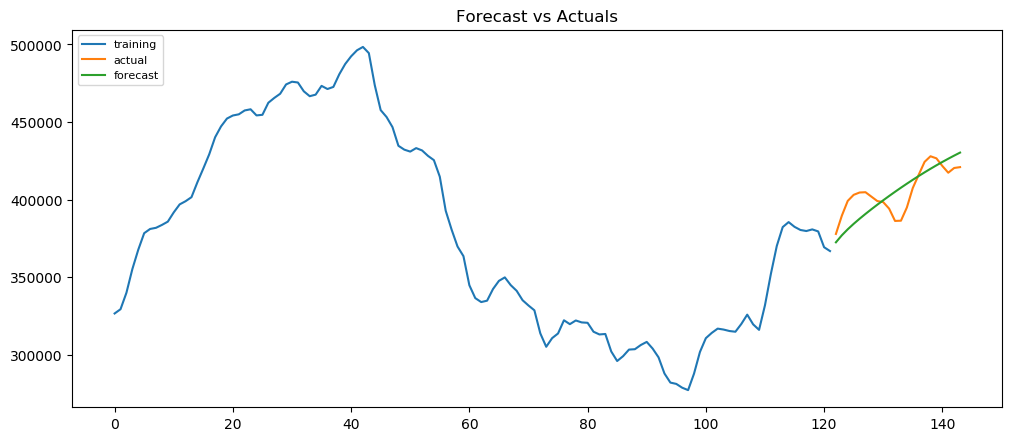

In [56]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit(20, ic='bic')
# print(model_fit.summary())

fc = model_fit.forecast(model_fit.y, steps=len(test))
cols = series.columns
pred = pd.DataFrame(index=test.index,columns=[cols])
for j in range(0,2):
    for i in range(0, len(fc)):
        pred.iloc[i][j] = fc[i][j]
    
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train["MedianSoldPrice_AllHomes.California"], label='training')
plt.plot(test["MedianSoldPrice_AllHomes.California"], label='actual')
plt.plot(pred[["MedianSoldPrice_AllHomes.California"]], label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [57]:
mse = ((pred["MedianSoldPrice_AllHomes.California"].values.flatten() - test["MedianSoldPrice_AllHomes.California"].values.flatten()) ** 2).mean()
rmse=round(np.sqrt(mse), 2)
print("RMSE for SARIMA: {:,.2f}".format(rmse))

RMSE for SARIMA: 11,538.43


VAR Impute and VAR
-----

### Imputation

In [89]:
zillow = pd.read_csv("zillow-carlifornia .csv")
zillow = zillow.drop(['Date'], axis=1)

In [90]:
rental_no_rental_na = zillow[~zillow["MedianRentalPrice_AllHomes.California"].isna()]
rental_in_between = rental_no_rental_na[~rental_no_rental_na["MedianSoldPrice_AllHomes.California"].isna()]

In [91]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=rental_in_between)
model_fit = model.fit(20, ic='bic')
# print(model_fit.summary())

fc = model_fit.forecast(model_fit.y, steps=72)
cols = rental_in_between.columns
pred = pd.DataFrame(index=range(0,72),columns=[cols])
for j in range(0,4):
    for i in range(0, len(fc)):
        pred.iloc[i][j] = fc[i][j]

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [93]:
pred.columns=['MedianSoldPrice_AllHomes.California','MedianMortageRate','UnemploymentRate','MedianRentalPrice_AllHomes.California']

In [94]:
before = pred["MedianRentalPrice_AllHomes.California"]

In [95]:
after = zillow[~zillow['MedianRentalPrice_AllHomes.California'].isna()]["MedianRentalPrice_AllHomes.California"]

In [96]:
zillow['MedianRentalPrice_AllHomes.California'] = pd.concat([before,after]).sort_index(ascending=False).reset_index().drop(columns='index')['MedianRentalPrice_AllHomes.California']

In [97]:
zillow['MedianRentalPrice_AllHomes.California'] = zillow['MedianRentalPrice_AllHomes.California'][::-1].reset_index().drop(columns='index')['MedianRentalPrice_AllHomes.California'].astype(float)

### VAR

In [66]:
series = zillow.loc[~zillow['MedianSoldPrice_AllHomes.California'].isna()]

In [67]:
train = series[:int(0.85*(len(series)))]
test = series[int(0.85*(len(series))):]
train.head()

,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate,MedianRentalPrice_AllHomes.California
0,326752.55,5.02,7.9,2202.572015
1,329501.50,4.94,7.8,2250.288130
2,340125.45,4.74,7.8,2287.824863
3,355329.50,5.16,7.5,2354.079618
4,367818.15,5.64,7.3,2428.385177


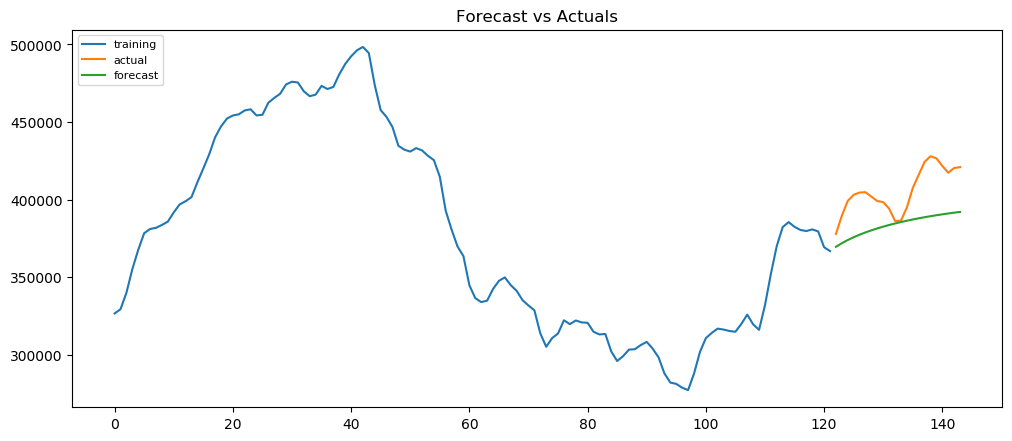

In [68]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit(20, ic='bic')
# print(model_fit.summary())

fc = model_fit.forecast(model_fit.y, steps=len(test))
cols = series.columns
pred = pd.DataFrame(index=test.index,columns=[cols])
for j in range(0,2):
    for i in range(0, len(fc)):
        pred.iloc[i][j] = fc[i][j]
    
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train["MedianSoldPrice_AllHomes.California"], label='training')
plt.plot(test["MedianSoldPrice_AllHomes.California"], label='actual')
plt.plot(pred[["MedianSoldPrice_AllHomes.California"]], label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [69]:
mse = ((pred["MedianSoldPrice_AllHomes.California"].values.flatten() - test["MedianSoldPrice_AllHomes.California"].values.flatten()) ** 2).mean()
rmse=round(np.sqrt(mse), 2)
print("RMSE for SARIMA: {:,.2f}".format(rmse))

RMSE for SARIMA: 24,313.45


## Final Prediction

In [70]:
zillow = pd.read_csv("zillow-carlifornia .csv")
zillow = zillow.drop(['Date'], axis=1)

In [71]:
inversed_rental = zillow['MedianRentalPrice_AllHomes.California'].sort_index(ascending=False).reset_index().drop(columns='index')
train_rental = inversed_rental[~inversed_rental['MedianRentalPrice_AllHomes.California'].isna()]['MedianRentalPrice_AllHomes.California']

In [72]:
import pmdarima as pm
model_rental = pm.auto_arima(train_rental, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_rental.summary())

Fit ARIMA: order=(1, 1, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0); AIC=1013.491, BIC=1018.513, Fit time=0.002 seconds
Fit ARIMA: order=(1, 1, 0); AIC=1013.307, BIC=1020.839, Fit time=0.032 seconds
Fit ARIMA: order=(0, 1, 1); AIC=1013.925, BIC=1021.458, Fit time=0.015 seconds
Fit ARIMA: order=(2, 1, 0); AIC=1012.382, BIC=1022.425, Fit time=0.048 seconds
Fit ARIMA: order=(2, 1, 1); AIC=1101.090, BIC=1113.645, Fit time=0.234 seconds
Fit ARIMA: order=(3, 1, 1); AIC=1035.781, BIC=1050.846, Fit time=0.284 seconds
Fit ARIMA: order=(3, 1, 0); AIC=1013.460, BIC=1026.015, Fit time=0.053 seconds
Total fit time: 0.693 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   91
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -502.191
Method:                       css-mle   S.D. of innovations             60.290
Date:                Tue, 10 Dec 2

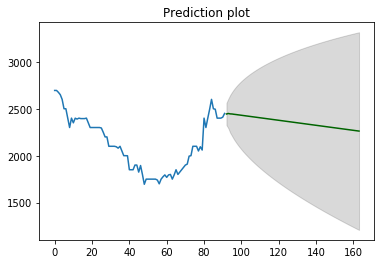

In [73]:
# Forecast
n_periods = 72
fc, confint = model_rental.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(train_rental), len(train_rental)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train_rental)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Prediction plot")
plt.show()

In [74]:
zillow['MedianRentalPrice_AllHomes.California'] = pd.concat([train_rental,fc_series]).sort_index(ascending=False).reset_index().drop(columns='index')[0]

In [75]:
series = zillow.loc[~zillow['MedianSoldPrice_AllHomes.California'].isna()]

In [76]:
train = series

In [77]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit(20, ic='bic')
# print(model_fit.summary())

fc = model_fit.forecast(model_fit.y, steps=20)
cols = series.columns
pred = pd.DataFrame(index=range(144,164),columns=[cols])
for j in range(0,2):
    for i in range(0, len(fc)):
        pred.iloc[i][j] = fc[i][j]
pred1 = pred["MedianSoldPrice_AllHomes.California"]
pred1.columns = ['MedianSoldPrice_AllHomes.California']
pred1 = pred1['MedianSoldPrice_AllHomes.California']

In [78]:
zillow = pd.read_csv("zillow-carlifornia .csv")
zillow = zillow.drop(['Date'], axis=1)

In [79]:
y_train = zillow['MedianSoldPrice_AllHomes.California']

In [80]:
y_train = y_train[~y_train.isna()]

In [81]:
model = ExponentialSmoothing(y_train, trend="add", seasonal="add", seasonal_periods=12,damped=False)

In [82]:
fit = model.fit()
pred2 = fit.forecast(20)

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


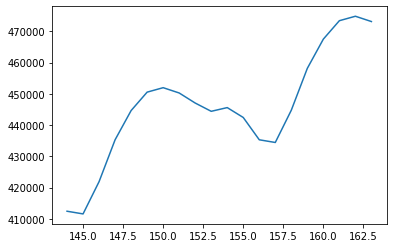

In [83]:
plt.plot(pred2, label='additive additive forecast')

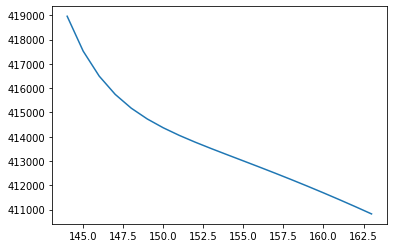

In [84]:
plt.plot(pred1, label='additive additive forecast')

In [85]:
final_pred = (pred2 + pred1)/2

In [86]:
final_pred = final_pred.astype(float)

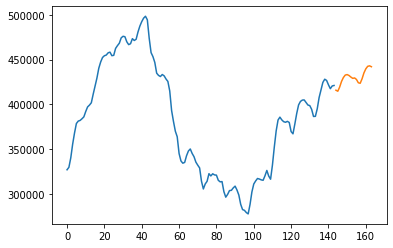

In [87]:
plt.plot(y_train)
plt.plot(final_pred)

In [102]:
final_pred.to_csv('./prediction.csv',index=False,header=True)